## Laboratory Manual for SC1003 - Introduction to Computational Thinking and Programming

### Practical Exercise #9: Pattern Recognition

##### Learning Objectives
- Analyse a problem and recognize the pattern
- Develop a simulator based on the identified pattern

##### Equipment and accessories required
- PC/notebook with python and jupyter notebook

---

### 1) Pattern Recognition
Pattern recognition is a fundamental concept in computational thinking that involves identifying and understanding patterns within data or problems. This process helps in simplifying complex problems by breaking them down into more manageable parts. By recognizing patterns, one can predict future behavior, make informed decisions, and create algorithms that can solve problems more efficiently.

In computational thinking, pattern recognition typically involves the following steps:

- **Observation**: Identifying common elements or features in problems.
- **Categorization**: Identifying and intepreting common differences between problems.
- **Decomposition & Abstraction**: Identifying individual elements within problems.
- **Generalization**: Formulating general rules or principles based on the identified patterns.
- **Application**: Using the recognized patterns to solve new problems or to optimize existing solutions (making prediction).

For example, in the context of programming, pattern recognition might involve identifying common sequences of code that perform similar tasks, which can then be abstracted into functions or classes to promote code reuse and efficiency.




### 2) Cellular Automata
A cellular automaton is a collection of "colored" cells on a grid of specified shape that evolves through a number of discrete time steps (generation) according to a set of rules (0-255) based on the states of neighboring cells. The rules are then applied iteratively for as many time steps as desired [1]. The simplest type of cellular automaton is a binary, nearest-neighbor, one-dimensional automaton. Such automata were called "elementary cellular automata" by S. Wolfram [2].

<img src="https://mathworld.wolfram.com/images/eps-svg/ElementaryCARule030_700.svg"><br> 

*Source:[1]*


As a starting point, you may watch the video [3] to get a sense how cellular automata works and its rules. Most importantly, try to understanding the concept, decompose the problem, identifying the pattern, and then implement a simulator which take in three input i.e. rule number (0-255), number of generation (step), and initial state (e.g. `00010000`). The simulator will then generate the pattern based on the implemented elementary cellular automata logic. You must test your simulator to ensure your logic is correct and produce the right output on this Jupyter Notebook when given the rule and initial state of say `00010000`. 

**IMPORTANT**: While you are encourage to read articles or watch as many videos as possible to undestand cellular automata and identify the pattern, you are discourage to refer or generate any code while completing this exercise, as this will defeat its purpose and objective. Worst is that you will learn not much about pattern recognition by getting code from elsewhere.


### 3) Advance Task (Optional)
Once you completed the task above, you may consider implementing the Elementary Cellular Automata using better visualization library such as matplotlib or pygame.

If you wish to go even further, you can try to explore 2D Cellular Automata which also known as "Game of Life".  
<img src="https://mathworld.wolfram.com/images/gifs/puffertr.gif"><br>*Source:[1]*

##### References:
[1] Wolform Mathworld, "Cellular Automaton". \<https://mathworld.wolfram.com/CellularAutomaton.html\>  
[2] Wolform mathworld, "Elementary Cellular Automata". \<https://mathworld.wolfram.com/\>  ElementaryCellularAutomaton.html  
[3] The Coding Train, Elementary Cellular Automata Video. Youtube \<https://youtu.be/Ggxt06qSAe4\>  

In [1]:
## THIS FUNCTION IS GIVEN TO STUDENT
"""
a function to convert a rule number (int) to its binary representation (str)

Parameters: 
rule_number (int): a range of numbers 0-255

Returns: 
string of binary representation
"""
def rule_to_binary(rule_number):
    
    return f"{rule_number:08b}"

In [2]:
"""
a function to get the neighborhood of a cell.

Parameters: 
state (str) - current state in binary format
index (int) : the index to yield its neighbour 
8 bits -> 0 - 7

Returns: 
string of 3 binary representation
"""
def get_neighborhood(state, index):
    state = list(state)
    left = state[(index-1) % len(state)]
    center = state[index]
    right = state[(index+1) % len(state)]
    total = left + center + right
    return total

In [3]:
"""
a function to compute the next state of the automaton based on the current state and the rule.

Parameter: 
state (str) : current state in binary format
rule_binary (int) : the index to yield its neighbour

Returns: 
new binary representation (next generation)
"""
def next_state(current_state, rule_binary):
    rule_binary = rule_to_binary(rule_binary)
    next_state = ''

    for i in range(len(current_state)):
        # Get the neighborhood of the current cell
        present_state = get_neighborhood(current_state, i)

        # Map the neighborhood to the corresponding rule output
        rule_index = int(present_state, 2)  # Convert binary neighborhood to decimal index - int(value,base) int(000, 2) - 0
        next_state += rule_binary[7 - rule_index]  # Rule binary is in reverse order

    return next_state

print(next_state('0000001000000',30))

0000011100000


In [4]:
"""
Simulates a one-dimensional cellular automaton.

Parameters:
initial_state (list of str): The initial state of the automaton, represented as a list of characters (e.g., '0' and '1').
rule_number (int): The rule number (0-255) defining the automaton's behavior, which is converted to binary.
generations (int): The number of generations to simulate.

Returns:
None: The function prints each generation's state to the console.
"""
def simulate_automaton(initial_state, rule_number, generations):
    data = []
    present_state = initial_state
    print(*present_state, sep='')
    for i in range(generations):
        new_state = next_state(present_state,rule_number)
        print(new_state)
        present_state = new_state
        data.append(list(map(int,present_state)))
    return data


000010000
000111000
001100100
011011110
110010001
001111011
111000010
100100110
111111100
100000011
010000110
111001101
000111001
101100111
001011100
011010010
110011111
001110000
011001000
110111100
100100011


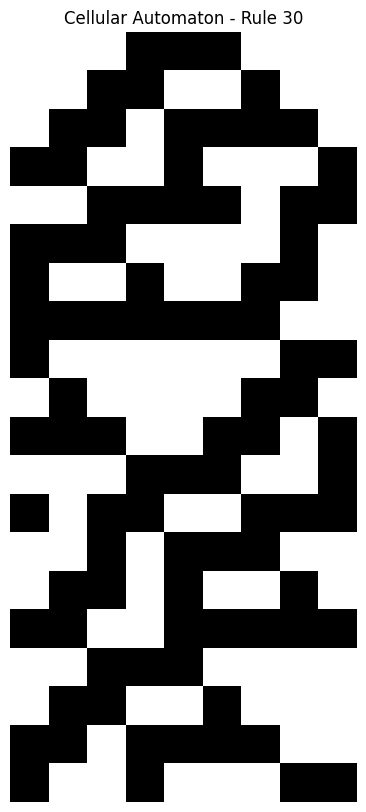

In [5]:
import matplotlib.pyplot as plt

## main function to take user input and run the simulation
def main():
    rule_number = int(input("Enter the rule number (0-255): "))
    initial_state = list(input("Enter the initial state (e.g., 0001000): "))
    generations = int(input("Enter the number of generations: "))
    states = simulate_automaton(initial_state, rule_number, generations)

    # Plot the states
    plt.figure(figsize=(5, 10)) 
    plt.imshow(states, cmap='binary', interpolation='nearest')
    plt.title(f"Cellular Automaton - Rule {rule_number}")
    plt.axis("off")
    plt.show()
main()

### 4) Example




rule: 30
initial state: 0000001000000
generation: 20

Output:
```
0000001000000
0000011100000
0000110010000
0001101111000
0011001000100
0110111101110
1100100001001
0011110011111
1110001110000
1001011001001
0111010111111
0100010100000
1110110110000
1000100101001
0101111101111
0101000001000
1101100011100
1001010110011
0111010101110
1100010101001
```